# Description des données

In [1]:
from sklearn.datasets import load_wine
data = load_wine(return_X_y=False)
print(data.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [2]:
data = load_wine(return_X_y=True)
X = data[0]
y = data[1]

print(type(X))
print(type(y))

print(X)
print(y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Centrer-réduire les données, très important

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


## 2 ensembles: entrainement, et test

In [4]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.3

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=seed, shuffle=True, stratify=y)
print(X_train.shape[0])
print(X_test.shape[0])

124
54


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, copy=True)
res_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

[0.34976245 0.19717542]


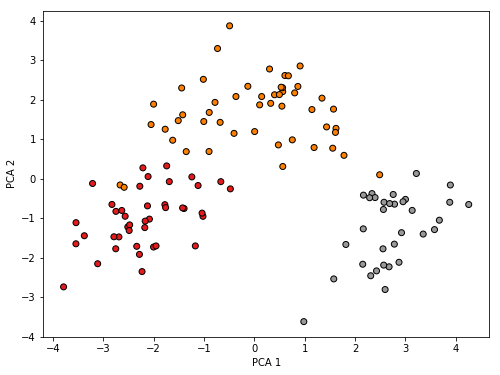

In [7]:
import matplotlib.pyplot as plt

x_min, x_max = res_pca[:,0].min() - 10, res_pca[:,0].max() + 10
y_min, y_max = res_pca[:,1].min() - 10, res_pca[:,1].max() + 10

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(res_pca[:, 0], res_pca[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

# Réseaux de neurones

## Tensorflow

In [8]:
n_inputs = 13
n_hidden = 20
n_outputs = 3

learning_rate = 0.01
#momentum = 0.9

n_epochs = 100
batch_size = 31 #4*31=124
n_batches_per_epoch = X_train.shape[0] // batch_size
print(n_batches_per_epoch)

4


In [9]:
import numpy as np
import tensorflow as tf

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
y = tf.placeholder(tf.int64, shape=[None], name="y")

hidden1 = tf.layers.dense(inputs=X, units=n_hidden, name="hidden1", activation=tf.nn.relu)
logits = tf.layers.dense(inputs=hidden1, units=n_outputs, name="outputs")
inference = tf.nn.softmax(logits, name="inference")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

summary_writer = tf.summary.FileWriter(".", tf.get_default_graph())

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(n_batches_per_epoch):
            X_batch = X_train[iteration*batch_size:(iteration+1)*batch_size]
            y_batch = y_train[iteration*batch_size:(iteration+1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        print(epoch, "Train accuracy:", acc_train)
    
    acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
    print(epoch, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

/Users/Antoine/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0 Train accuracy: 0.2580645
1 Train accuracy: 0.32258064
2 Train accuracy: 0.36290324
3 Train accuracy: 0.4032258
4 Train accuracy: 0.43548387
5 Train accuracy: 0.47580644
6 Train accuracy: 0.516129
7 Train accuracy: 0.5564516
8 Train accuracy: 0.61290324
9 Train accuracy: 0.63709676
10 Train accuracy: 0.63709676
11 Train accuracy: 0.66129035
12 Train accuracy: 0.7096774
13 Train accuracy: 0.7419355
14 Train accuracy: 0.7580645
15 Train accuracy: 0.766129
16 Train accuracy: 0.766129
17 Train accuracy: 0.7741935
18 Train accuracy: 0.7822581
19 Train accuracy: 0.7822581
20 Train accuracy: 0.7983871
21 Train accuracy: 0.8145161
22 Train accuracy: 0.8145161
23 Train accuracy: 0.8145161
24 Train accuracy: 0.82258064
25 Train accuracy: 0.82258064
26 Train accuracy: 0.82258064
27 Train accuracy: 0.83870965
28 Train accuracy: 0.8467742
29 Train accuracy: 0.8548387
30 Train accuracy: 0.87096775
31 Train accuracy: 0.87096775
32 Train accuracy: 0.87903225
33 Train accuracy: 0.87903225
34 Train ac

In [10]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    res = sess.run(inference, feed_dict={X: X_train})

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [11]:
print(y_test)
print(res)

[0 1 0 0 0 0 2 1 1 2 1 1 2 1 0 2 1 0 2 2 1 2 2 2 1 2 0 1 0 1 0 1 2 1 1 2 1
 1 1 0 2 0 0 0 0 1 1 0 2 0 1 1 2 0]
[[9.39360023e-01 3.18245851e-02 2.88153905e-02]
 [9.56117392e-01 2.96848249e-02 1.41977416e-02]
 [8.65552425e-01 9.14575085e-02 4.29899693e-02]
 [9.71555710e-01 1.88882407e-02 9.55602340e-03]
 [7.83957243e-02 9.09878254e-01 1.17260367e-02]
 [9.40736532e-01 3.83835845e-02 2.08798014e-02]
 [2.51858262e-03 6.93893526e-03 9.90542471e-01]
 [7.64517039e-02 9.13533986e-01 1.00142797e-02]
 [2.93898918e-02 1.40351161e-01 8.30258965e-01]
 [9.15563881e-01 5.06775305e-02 3.37586030e-02]
 [2.15758055e-01 6.88108742e-01 9.61331800e-02]
 [4.81337830e-02 8.89552832e-01 6.23133890e-02]
 [1.00294901e-02 3.21439914e-02 9.57826495e-01]
 [3.10493380e-01 5.96345842e-01 9.31607857e-02]
 [9.53332722e-01 2.89620310e-02 1.77052543e-02]
 [9.72336411e-01 1.69717856e-02 1.06917936e-02]
 [4.71212268e-01 4.87439692e-01 4.13480066e-02]
 [5.14633775e-01 4.70224738e-01 1.51414825e-02]
 [4.91301976e-02 9.256649

## Réseau "fait à la main"